In [1]:
# import tensorflow as tf
# tf.config.experimental.list_physical_devices('GPU')
# gpus = tf.config.experimental.list_physical_devices('GPU')
# if gpus:
#     # Restrict TensorFlow to only allocate 1GB * 2 of memory on the first GPU
#     try:
#         tf.config.experimental.set_virtual_device_configuration(
#             gpus[0],
#             [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1024 * 10)])
#         logical_gpus = tf.config.experimental.list_logical_devices('GPU')
#         print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
#     except RuntimeError as e:
#         # Virtual devices must be set before GPUs have been initialized
#         print(e)

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os,cv2

In [3]:
directory="cropeyeimages"
classses=os.listdir(directory)
print(classses)

['Roshan', 'Yash']


In [4]:
import os
import cv2
image_size=224
data1=[]#empty list
for category in classses:
    path = os.path.join(directory, category)
    print(path)
    label = classses.index(category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        arr = cv2.imread(img_path)#Reading Images
        arr = cv2.cvtColor(arr, cv2.COLOR_BGR2RGB)
        new_arr = cv2.resize(arr, (image_size, image_size))#Resizing into same shape
        data1.append([new_arr, label])

cropeyeimages\Roshan
cropeyeimages\Yash


In [5]:
import random
random.shuffle(data1)

In [6]:
len(data1)

260

In [7]:
classses

['Roshan', 'Yash']

In [8]:
len(classses)

2

In [9]:
x=[]#ndependent
y=[]#dependent
for features,labels in data1:
    x.append(features)
    y.append(labels)

In [10]:
x=np.array(x)
y=np.array(y)
#x=x/255 #feature scaling

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [12]:
from tensorflow.keras import applications
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential ,Model, load_model
from tensorflow.keras.layers import Dropout, Flatten, Dense ,Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, TensorBoard
base_model = applications.VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))
model = Sequential()
model.add(base_model)
model.add(Flatten(input_shape=base_model.output_shape[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(len(classses), activation='softmax'))
model = Model(inputs=model.input, outputs=model.output)
model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizers.Adam(learning_rate=0.0001),metrics=['accuracy'])

In [13]:
progess = model.fit(x=X_train,y=y_train,epochs=5,validation_data= (X_test, y_test),batch_size=128)

Epoch 1/5
2/2 [==============================] - 39s 19s/step - loss: 2.7820 - accuracy: 0.6058 - val_loss: 2.4437 - val_accuracy: 0.5000
Epoch 2/5
2/2 [==============================] - 39s 20s/step - loss: 1.3349 - accuracy: 0.6827 - val_loss: 0.1435 - val_accuracy: 0.9423
Epoch 3/5
2/2 [==============================] - 39s 20s/step - loss: 0.1798 - accuracy: 0.9183 - val_loss: 0.0858 - val_accuracy: 0.9423
Epoch 4/5
2/2 [==============================] - 39s 20s/step - loss: 0.1550 - accuracy: 0.9423 - val_loss: 0.1110 - val_accuracy: 0.9615
Epoch 5/5
2/2 [==============================] - 39s 20s/step - loss: 0.0407 - accuracy: 0.9808 - val_loss: 0.0689 - val_accuracy: 0.9615


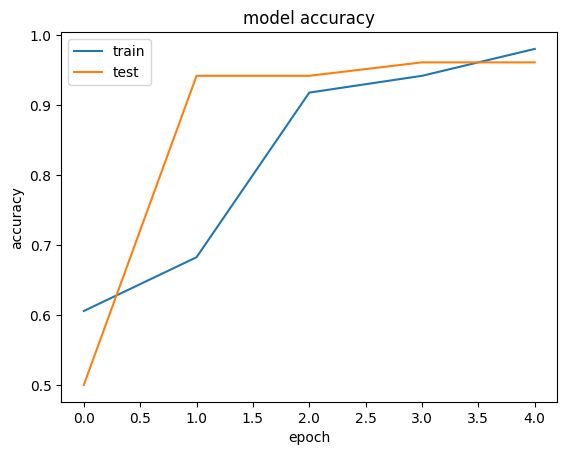

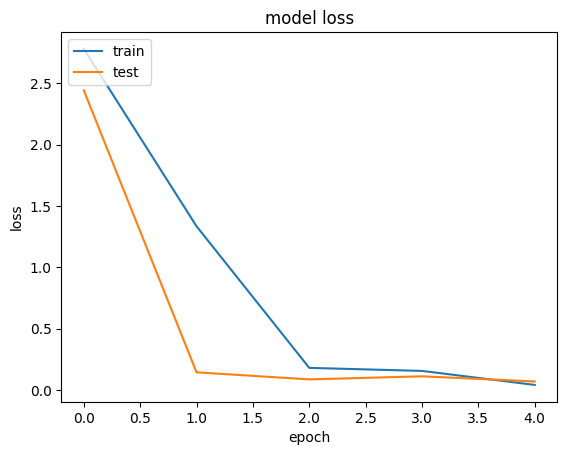

In [14]:
plt.plot(progess.history['accuracy'])
plt.plot(progess.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(progess.history['loss'])
plt.plot(progess.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(X_test)

y_pred_new=[]
for i in y_pred:
    #print(i)
    #break
    y=np.argmax(i)
    #break
    #print(y)
    y_pred_new.append(y)
    #break

<AxesSubplot:>

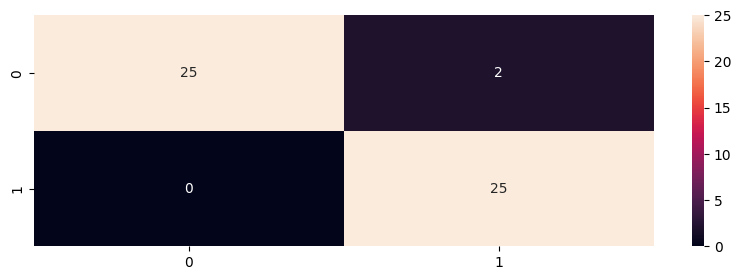

In [16]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test,y_pred_new)
import pandas as pd
df_cm=pd.DataFrame(cm)
import seaborn as sns
plt.figure(figsize = (10,3))
sns.heatmap(df_cm, annot=True)

In [17]:
import json
import h5py

model_json = model.to_json()
with open("allmodel/vgg_model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("allmodel/vgg_model.h5")
print("Saved model to disk")

Saved model to disk


**Inception V3**

In [18]:
from tensorflow.keras import applications
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential ,Model, load_model
from tensorflow.keras.layers import Dropout, Flatten, Dense ,Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, TensorBoard
base_model = applications.InceptionV3(weights='imagenet', include_top=False, input_shape=(224,224,3))
incept_model = Sequential()
incept_model.add(base_model)
incept_model.add(Flatten(input_shape=base_model.output_shape[1:]))
incept_model.add(Dense(256, activation='relu'))
incept_model.add(Dropout(0.2))
incept_model.add(Dense(128, activation='relu'))
incept_model.add(Dropout(0.2))
incept_model.add(Dense(len(classses), activation='softmax'))
incept_model = Model(inputs=incept_model.input, outputs=incept_model.output)
incept_model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizers.Adam(learning_rate=0.0001),metrics=['accuracy'])

In [19]:
incept_progess = incept_model.fit(x=X_train,y=y_train,epochs=5,validation_data= (X_test, y_test),batch_size=128)

Epoch 1/5
2/2 [==============================] - 19s 10s/step - loss: 0.8276 - accuracy: 0.5096 - val_loss: 1.9719 - val_accuracy: 0.5192
Epoch 2/5
2/2 [==============================] - 17s 9s/step - loss: 0.4083 - accuracy: 0.7885 - val_loss: 1.6027 - val_accuracy: 0.4808
Epoch 3/5
2/2 [==============================] - 17s 9s/step - loss: 0.1675 - accuracy: 0.9423 - val_loss: 1.9013 - val_accuracy: 0.4808
Epoch 4/5
2/2 [==============================] - 18s 9s/step - loss: 0.0245 - accuracy: 1.0000 - val_loss: 0.9516 - val_accuracy: 0.5192
Epoch 5/5
2/2 [==============================] - 17s 9s/step - loss: 0.0195 - accuracy: 0.9904 - val_loss: 0.8387 - val_accuracy: 0.6538


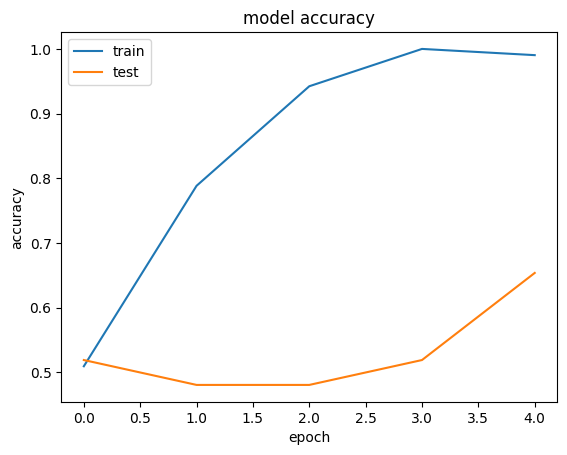

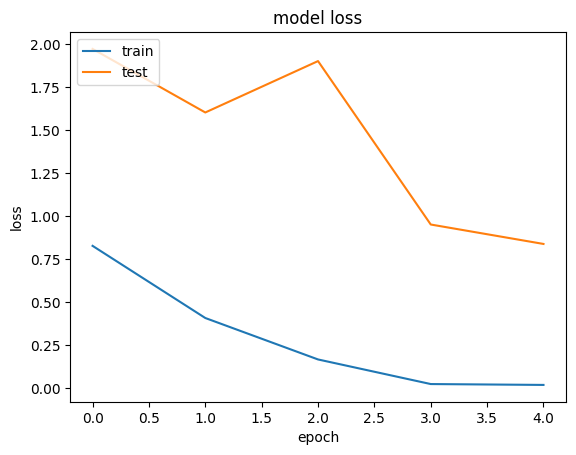

In [20]:
plt.plot(incept_progess.history['accuracy'])
plt.plot(incept_progess.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(incept_progess.history['loss'])
plt.plot(incept_progess.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [21]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = incept_model.predict(X_test)

y_pred_new=[]
for i in y_pred:
    #print(i)
    #break
    y=np.argmax(i)
    #break
    #print(y)
    y_pred_new.append(y)
    #break


<AxesSubplot:>

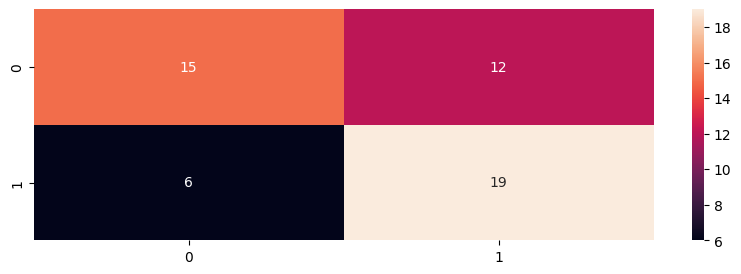

In [22]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test,y_pred_new)
import pandas as pd
df_cm=pd.DataFrame(cm)
import seaborn as sns
plt.figure(figsize = (10,3))
sns.heatmap(df_cm, annot=True)

In [23]:
import json
import h5py

model_json = incept_model.to_json()
with open("allmodel/incept_model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
incept_model.save_weights("allmodel/incept_model.h5")
print("Saved model to disk")

Saved model to disk


Resnet 50

In [24]:
from tensorflow.keras import applications
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential ,Model, load_model
from tensorflow.keras.layers import Dropout, Flatten, Dense ,Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, TensorBoard
base_model = applications.ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))
res_model = Sequential()
res_model.add(base_model)
res_model.add(Flatten(input_shape=base_model.output_shape[1:]))
res_model.add(Dense(256, activation='relu'))
res_model.add(Dropout(0.2))
res_model.add(Dense(128, activation='relu'))
res_model.add(Dropout(0.2))
res_model.add(Dense(len(classses), activation='softmax'))
res_model = Model(inputs=res_model.input, outputs=res_model.output)
res_model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizers.Adam(learning_rate=0.0001),metrics=['accuracy'])

In [25]:
res_progess = res_model.fit(x=X_train,y=y_train,epochs=5,validation_data= (X_test, y_test),batch_size=128)

Epoch 1/5
2/2 [==============================] - 36s 18s/step - loss: 1.3730 - accuracy: 0.5433 - val_loss: 0.8896 - val_accuracy: 0.5769
Epoch 2/5
2/2 [==============================] - 35s 18s/step - loss: 0.1597 - accuracy: 0.9183 - val_loss: 1.2855 - val_accuracy: 0.5577
Epoch 3/5
2/2 [==============================] - 35s 18s/step - loss: 0.0143 - accuracy: 1.0000 - val_loss: 0.4472 - val_accuracy: 0.7500
Epoch 4/5
2/2 [==============================] - 35s 17s/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.1081 - val_accuracy: 0.9423
Epoch 5/5
2/2 [==============================] - 35s 17s/step - loss: 2.5119e-04 - accuracy: 1.0000 - val_loss: 0.0304 - val_accuracy: 1.0000


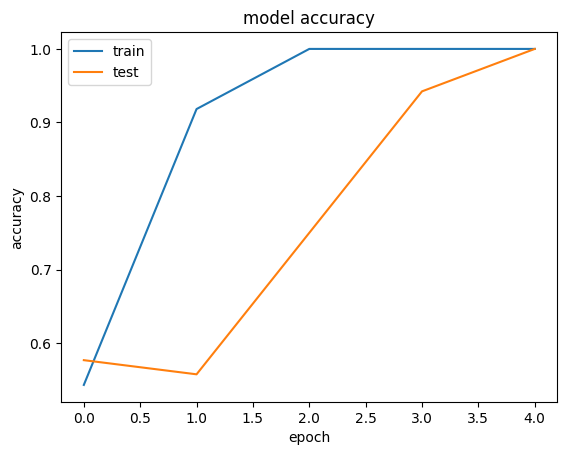

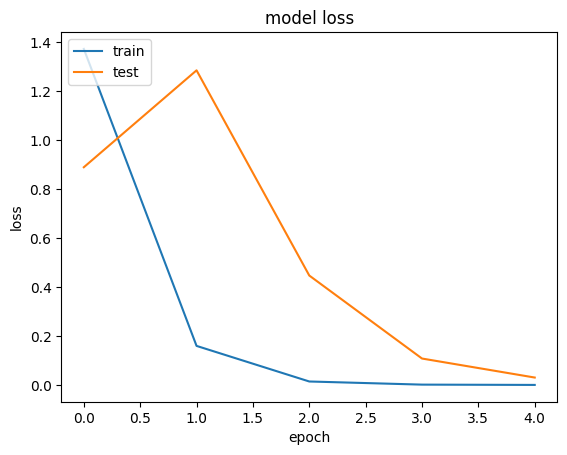

In [26]:
plt.plot(res_progess.history['accuracy'])
plt.plot(res_progess.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(res_progess.history['loss'])
plt.plot(res_progess.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [27]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = res_model.predict(X_test)

y_pred_new=[]
for i in y_pred:
    #print(i)
    #break
    y=np.argmax(i)
    #break
    #print(y)
    y_pred_new.append(y)
    #break

<AxesSubplot:>

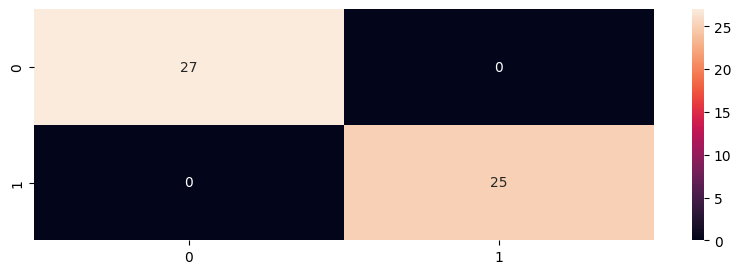

In [28]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test,y_pred_new)
import pandas as pd
df_cm=pd.DataFrame(cm)
import seaborn as sns
plt.figure(figsize = (10,3))
sns.heatmap(df_cm, annot=True)

In [29]:
import json
import h5py

model_json = res_model.to_json()
with open("allmodel/res_model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
res_model.save_weights("allmodel/res_model.h5")
print("Saved model to disk")

Saved model to disk


In [30]:
import tensorflow
json_file = open('allmodel/res_model.json', 'r')
loaded_model_json = json_file.read()
# json_file.close()
loaded_model = tensorflow.keras.models.model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("allmodel/res_model.h5")
print("Loaded model from disk")

Loaded model from disk


In [31]:
import os
import numpy as np

In [32]:
for i in os.listdir("test"):
    print(i)

    from tensorflow import keras
    # model = keras.models.load_model('/content/VGGSKin.h5')
    model = loaded_model
    from tensorflow.keras.preprocessing import image
    image_size=224
    #img = cv2.imread(path1+"//"+i)
    path="test/"+i
    img = image.load_img(path, target_size=(image_size, image_size))
    x = image.img_to_array(img)
    print(type(x))
    img_4d=x.reshape(1,224,224,3)
    #img_4d=img_4d/255
    # model = keras.models.load_model('/content/VGGSKin.h5')
    model = loaded_model
    predictions = model.predict(img_4d)
    print(predictions[0])
    new_pred=np.argmax(predictions[0])
    print(new_pred)

    # dict1={0:'Tomato__Target_Spot',
    #         1:'Pepper__bell___healthy',
    #         2:'Potato___Early_blight',
    #         3:'Pepper__bell___Bacterial_spot',
    #         4:'Potato___Late_blight',
    #         5:'Potato___healthy'}

    dict1={0:'Roshan',
            1:'Yash'}

    a=dict1[new_pred]

    print(str(a))
    print("-----------------------------------------------")
    #break

r1.jpg
<class 'numpy.ndarray'>
[0.99579084 0.00420911]
0
Roshan
-----------------------------------------------
r2.jpg
<class 'numpy.ndarray'>
[9.9994457e-01 5.5472370e-05]
0
Roshan
-----------------------------------------------
r3.jpg
<class 'numpy.ndarray'>
[9.9958891e-01 4.1109478e-04]
0
Roshan
-----------------------------------------------
r4.jpg
<class 'numpy.ndarray'>
[0.9796681  0.02033184]
0
Roshan
-----------------------------------------------
y1.jpg
<class 'numpy.ndarray'>
[0.04430264 0.95569736]
1
Yash
-----------------------------------------------
y2.jpg
<class 'numpy.ndarray'>
[0.10907859 0.8909214 ]
1
Yash
-----------------------------------------------
y3.jpg
<class 'numpy.ndarray'>
[1.390948e-04 9.998609e-01]
1
Yash
-----------------------------------------------
y4.jpg
<class 'numpy.ndarray'>
[7.065591e-05 9.999293e-01]
1
Yash
-----------------------------------------------
y5.jpg
<class 'numpy.ndarray'>
[1.0317182e-05 9.9998963e-01]
1
Yash
------------------------